In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from utils import read_data, K
from tqdm import tqdm
import seaborn as sns
from utils import read_data
from data_processing import *

In [71]:
DATA_PATH = 'data/data.csv'
MOVIES_PATH = 'data/movies.csv'

data = pd.read_csv(DATA_PATH, sep=',')
movies = pd.read_csv(MOVIES_PATH, sep=',')
movies['Year'] = movies['Movie Title'].str[-5:].str[:4].astype('int') 

In [72]:
movies

,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,0,(500) Days of Summer (2009),0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,2009
1,1,10 Cloverfield Lane (2016),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2016
2,2,"10,000 BC (2008)",0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2008
3,3,12 Years a Slave (2013),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2013
4,4,127 Hours (2010),0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,Zoolander (2001),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2001
1496,1496,Zootopia (2016),0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,2016
1497,1497,[REC] (2007),0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,2007
1498,1498,xXx (2002),0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,2002


In [58]:
movies.max()['Year']

2018

In [59]:
movies.min()['Year']

2001

(array([262., 114., 120., 225., 104.,  97., 176.,  75.,  66., 134.,  54.,
         45.,  28.]),
 array([2001.        , 2002.30769231, 2003.61538462, 2004.92307692,
        2006.23076923, 2007.53846154, 2008.84615385, 2010.15384615,
        2011.46153846, 2012.76923077, 2014.07692308, 2015.38461538,
        2016.69230769, 2018.        ]),
 <BarContainer object of 13 artists>)

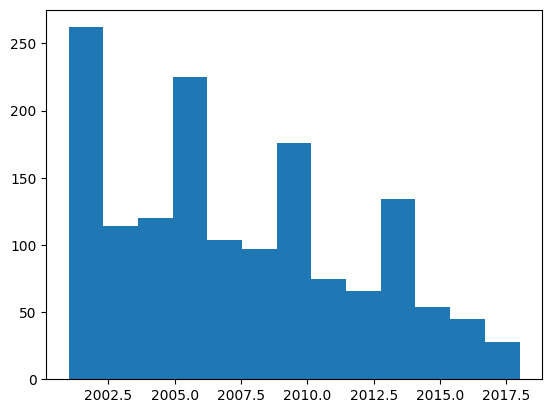

In [64]:
plt.hist(movies['Year'], bins='auto')

In [91]:
getGenre("Sci-Fi")

(array([  11,   12,   20,   21,   34,   37,   38,   39,   47,   50,   51,
          58,   62,   83,   85,   86,   94,   99,  103,  104,  105,  106,
         113,  124,  125,  127,  128,  129,  130,  157,  158,  162,  209,
         213,  217,  218,  219,  245,  246,  248,  252,  257,  263,  265,
         269,  279,  283,  287,  288,  292,  315,  316,  317,  318,  320,
         321,  323,  343,  344,  346,  350,  359,  360,  365,  368,  371,
         381,  385,  388,  396,  399,  406,  409,  414,  415,  427,  428,
         429,  442,  443,  457,  477,  478,  479,  480,  481,  482,  494,
         495,  496,  497,  500,  505,  507,  521,  524,  528,  533,  534,
         548,  570,  572,  582,  588,  593,  599,  613,  617,  618,  624,
         626,  634,  643,  647,  649,  651,  652,  663,  666,  676,  677,
         678,  680,  689,  692,  701,  708,  712,  714,  715,  716,  722,
         746,  753,  772,  785,  787,  797,  802,  818,  820,  832,  833,
         849,  850,  852,  859,  860, 

In [80]:
def getYearRange(start, end):
    before = movies.loc[movies['Year'] < end] 
    return before.loc[before['Year']>=start]["Movie ID"].to_numpy(), before.loc[before['Year']>=start]["Movie Title"].to_numpy()




Lets try plotting some rangeful things :)

In [66]:
from bias_model import *

In [67]:
from utils import read_data
data, movies = read_data()
U, V, a, b = get_U_V_a_b(data)

num_users, num_movies = compute_num_users_and_movies(data)
eta = 0.03
reg = 0.1
eps = 0.0001
max_epochs = 300
data_as_numpy = data.to_numpy(copy=True).astype(int)

A, S, B = np.linalg.svd(V)
approx_V = np.dot(A[:, :2].T, V)
approx_U = np.dot(A[:, :2].T, U)

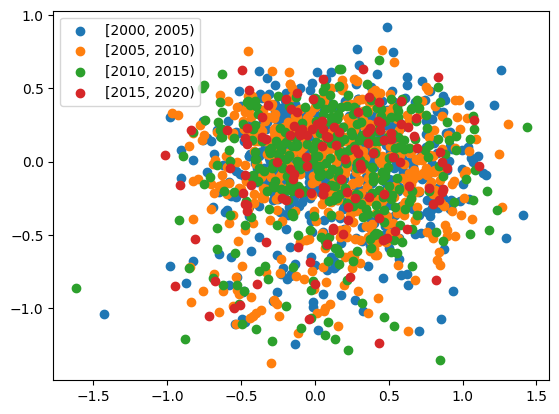

In [90]:
years = [2000,2005,2010,2015,2020]
fig = plt.figure()
ax1 = fig.add_subplot(111)
for y in range(len(years)-1):
    to_viz_np = []
    points, titles = getYearRange(years[y], years[y+1])
    for i in points:
        to_viz_np.append(approx_V[:,i])
    
    to_viz_np = np.array(to_viz_np)
    to_viz_df = pd.DataFrame(to_viz_np, columns = ['x', 'y'])
    ax1.scatter(to_viz_df['x'],to_viz_df['y'], label = "["+str(years[y])+", "+str(years[y+1])+")")
plt.legend(loc='upper left')

OK how about some genres?

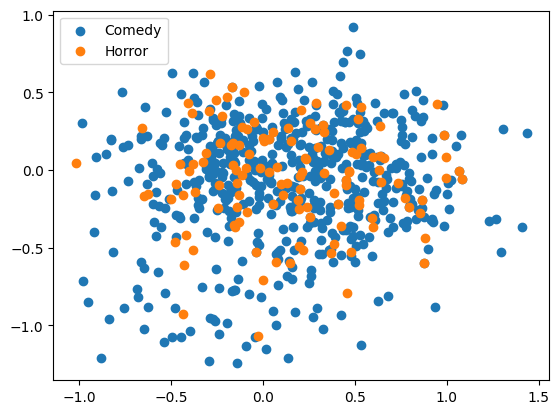

In [92]:
genres = ["Comedy", "Horror"]
fig = plt.figure()
ax1 = fig.add_subplot(111)
for genre in genres:
    to_viz_np = []
    points, titles = getGenre(genre)
    for i in points:
        to_viz_np.append(approx_V[:,i])
    
    to_viz_np = np.array(to_viz_np)
    to_viz_df = pd.DataFrame(to_viz_np, columns = ['x', 'y'])
    ax1.scatter(to_viz_df['x'],to_viz_df['y'], label = genre)
plt.legend(loc='upper left')